<a href="https://colab.research.google.com/github/izabelabe/CTR-prediction/blob/main/CTR_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy
!pip install pandas

You should consider upgrading via the 'C:\Users\izkab\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\izkab\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [ ]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\izkab\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [ ]:
import numpy as np 
import pandas as pd
import gzip
import random
import matplotlib

###### Reading train data, extracting a sample of size equal 1000000

In [ ]:
n = 40428967
sample_size = 1000000
skip_values = sorted(random.sample(range(1,n), n-sample_size))

with gzip.open('C:/Users/izkab/notebooks/avazu-ctr-prediction/train.gz') as f:
    train = pd.read_csv(f,skiprows = skip_values)

In [ ]:
train.head(15)

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10014285064795240866,1,14102100,1002,0,84c7ba46,c4e18dd6,50e219e0,ecad2386,7801e8d9,...,0,0,21682,320,50,2496,3,167,100191,23
1,10017306529805473196,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,febd1138,82e27996,...,1,0,19743,320,50,2264,3,427,100000,61
2,10022750613173712651,0,14102100,1005,0,5b08c53b,7687a86e,3e814130,ecad2386,7801e8d9,...,1,0,19016,300,250,2162,2,39,-1,33
3,10053066225125789362,0,14102100,1010,1,85f751fd,c4e18dd6,50e219e0,b7f64446,7801e8d9,...,4,2,20352,320,50,2333,0,39,-1,157
4,10056536800612540706,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,98fed791,d9b5648e,...,1,0,20980,320,50,2371,0,551,100215,46
5,1006019829529781335,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,e2fcccd2,5c5a694b,...,1,0,20634,320,50,2374,3,39,-1,23
6,10064037090970569308,0,14102100,1005,0,030440fe,08ba7db9,76b2941d,ecad2386,7801e8d9,...,1,0,20596,320,50,2161,0,35,-1,157
7,10074105370227008483,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
8,10076859283156800622,0,14102100,1002,0,f17ebd97,c4e18dd6,50e219e0,ecad2386,7801e8d9,...,0,0,21692,216,36,2497,3,43,100151,42
9,10082363717334339331,0,14102100,1005,1,5ee41ff2,17d996e6,f028772b,ecad2386,7801e8d9,...,1,0,16920,320,50,1899,0,431,100075,117


### Preparing data for time related analysis

In [ ]:
dateinfo = train[["click", "hour"]]
dateinfo.head()

,click,hour
0,1,14102100
1,0,14102100
2,0,14102100
3,0,14102100
4,0,14102100


In [ ]:
dateinfo.dtypes

click    int64
hour     int64
dtype: object

In [ ]:
dateinfo = dateinfo.astype({'hour' : 'string'})

In [ ]:
#parse_date = lambda val : pd.datetime.strptime(val, '%y%m%d%H')
#test = parse_dates = train["hour"], date_parser = parse_date  

In [ ]:
dateinfo["year"] = dateinfo['hour'].values
dateinfo["month"] = dateinfo['hour'].values
dateinfo["day"] = dateinfo['hour'].values

In [ ]:
dateinfo.dtypes

click     int64
hour     string
year     string
month    string
day      string
dtype: object

In [ ]:
dateinfo["hour"] = dateinfo["hour"].str.slice(6,8)
dateinfo["year"] = dateinfo["year"].str.slice(0,2)
dateinfo["month"] = dateinfo["month"].str.slice(2,4)
dateinfo["day"] = dateinfo["day"].str.slice(4,6)

In [ ]:
dateinfo.head(10)

,click,hour,year,month,day
0,1,00,14,10,21
1,0,00,14,10,21
2,0,00,14,10,21
3,0,00,14,10,21
4,0,00,14,10,21
5,0,00,14,10,21
6,0,00,14,10,21
7,0,00,14,10,21
8,0,00,14,10,21
9,0,00,14,10,21


In [ ]:
dateinfo.tail(10)

,click,hour,year,month,day
999990,0,23,14,10,30
999991,0,23,14,10,30
999992,1,23,14,10,30
999993,1,23,14,10,30
999994,0,23,14,10,30
999995,0,23,14,10,30
999996,0,23,14,10,30
999997,0,23,14,10,30
999998,0,23,14,10,30
999999,0,23,14,10,30


#### Distinction of hours when users clicked on a displayed add

In [ ]:
hours = dateinfo[["click", "hour"]].loc[dateinfo.click == 1]
hours.head()

,click,hour
0,1,00
15,1,00
21,1,00
36,1,00
37,1,00


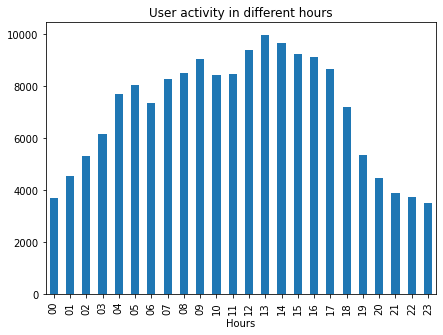

In [ ]:
from matplotlib import pyplot as plt

fig,ax = plt.subplots(figsize=(7,5))
plt.title('User activity in different hours')
plt.xlabel('Hours')

hourly_activity = hours['hour'].value_counts()
hourly_activity = pd.DataFrame(hourly_activity).sort_index()


hourly_activity['hour'].plot(kind='bar', legend = False)

plt.show()

###### Hours between 4 a.m. and 6 p.m where the most active once, when the most adds were displayed. This activity reachs its peak at 1 p.m

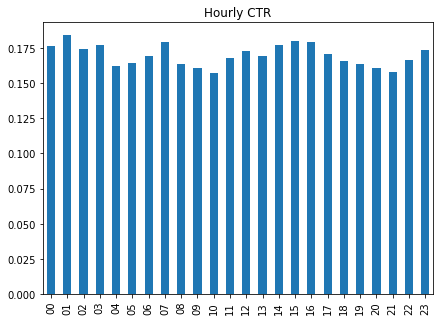

In [ ]:
fig,ax = plt.subplots(figsize=(7,5))
plt.title('Hourly CTR')

hours_ctr = hours['hour'].value_counts() / dateinfo["hour"].value_counts()

hours_ctr.plot(kind= 'bar')
plt.show()

###### Even tough most adds were diplayed at 1 p.m, this wasn't the time where CTR was the highest. Suprisingly,  users clicked on a displayed to them add most frequently at 1 a.m

### Weekday activity and CTR overview
##### Prepering the data

In [ ]:
dateinfo = dateinfo.astype({'day' : 'str'})
dateinfo["year"] = "20" + dateinfo["year"]
dateinfo["date"] = pd.to_datetime(dateinfo["year"] + "-" + dateinfo["month"] + "-" + dateinfo["day"])
dateinfo["weekday"] = dateinfo["date"].dt.day_name()
dateinfo.head()

,click,hour,year,month,day,date,weekday
0,1,00,2014,10,21,2014-10-21,Tuesday
1,0,00,2014,10,21,2014-10-21,Tuesday
2,0,00,2014,10,21,2014-10-21,Tuesday
3,0,00,2014,10,21,2014-10-21,Tuesday
4,0,00,2014,10,21,2014-10-21,Tuesday


In [ ]:
dateinfo.head(1000000)

,click,hour,year,month,day,date,weekday
0,1,00,2014,10,21,2014-10-21,Tuesday
1,0,00,2014,10,21,2014-10-21,Tuesday
2,0,00,2014,10,21,2014-10-21,Tuesday
3,0,00,2014,10,21,2014-10-21,Tuesday
4,0,00,2014,10,21,2014-10-21,Tuesday
...,...,...,...,...,...,...,...
999995,0,23,2014,10,30,2014-10-30,Thursday
999996,0,23,2014,10,30,2014-10-30,Thursday
999997,0,23,2014,10,30,2014-10-30,Thursday
999998,0,23,2014,10,30,2014-10-30,Thursday


##### Limiting the data only to 7 days intead of 9 to give a more accurate comparison of weekdays (we do not risk stabilizing the ctr more for weekdays that would occur twice)

In [ ]:
dateinfo = dateinfo.astype({'day' : 'int32'})
weekdays = dateinfo[["click", "weekday", "day"]].loc[dateinfo.day <= 27]
weekdays.tail(15)

,click,weekday,day
669953,1,Monday,27
669954,0,Monday,27
669955,0,Monday,27
669956,0,Monday,27
669957,0,Monday,27
669958,0,Monday,27
669959,0,Monday,27
669960,0,Monday,27
669961,0,Monday,27
669962,0,Monday,27


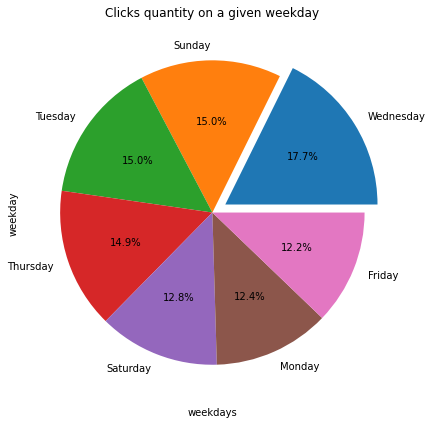

In [ ]:
fig,ax = plt.subplots(figsize=(7,7))
plt.title('Clicks quantity on a given weekday')
plt.xlabel('weekdays')
weekdays['weekday'].loc[weekdays.click == 1].value_counts().plot(kind='pie', autopct='%1.1f%%', explode = (0.1,0,0,0,0,0,0))

plt.show()

##### Biggest user activity was recorded on Wednesdays, most adds were displayed on that day

In [ ]:
active_weekdays = weekdays.loc[weekdays["click"] == 1]

In [ ]:
weekdays_ctr = active_weekdays["weekday"].value_counts() / weekdays['weekday'].value_counts()
print(weekdays_ctr)

Friday       0.173547
Monday       0.181502
Saturday     0.180713
Sunday       0.184487
Thursday     0.181738
Tuesday      0.173179
Wednesday    0.157555
Name: weekday, dtype: float64


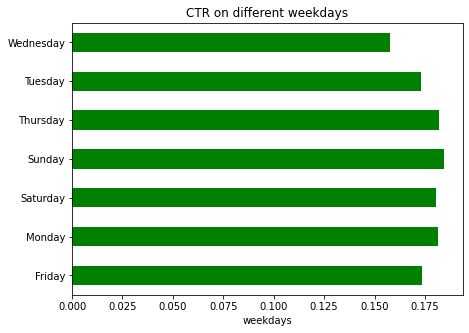

In [ ]:
fig,ax = plt.subplots(figsize=(7,5))
plt.title('CTR on different weekdays')
plt.xlabel('weekdays')
#weekdays_ctr.plot(kind='pie',legend = False,autopct='%1.1f%%', labeldistance = 1.05, startangle=90, explode = (0,0,0,0.1,0,0,0))
weekdays_ctr.plot(kind='barh', color = 'g')
plt.show()

######  Sundays and Thursdays were the days that had the highest CTR, adds were clicked on with the biggest frequency then

### Provided device information

In [ ]:
train[["device_id", "device_ip", "device_model"]].describe()

,device_id,device_ip,device_model
count,1000000,1000000,1000000
unique,149744,555360,5146
top,a99f214a,6b9769f2,8a4875bd
freq,825621,5240,60662


In [ ]:
train["device_type"].value_counts()

1    923130
0     54522
4     19179
5      3169
Name: device_type, dtype: int64

In [ ]:
train["device_conn_type"].value_counts()

0    862705
2     82124
3     54123
5      1048
Name: device_conn_type, dtype: int64

### Provided site information

In [ ]:
len(train["site_id"].unique())

2668

In [ ]:
train["site_category"].value_counts().head()

50e219e0    408096
f028772b    313728
28905ebd    182533
3e814130     75819
f66779e6      6276
Name: site_category, dtype: int64

In [ ]:
train["site_domain"].value_counts().head()

c4e18dd6    373678
f3845767    160737
7e091613     82927
7687a86e     31997
98572c79     24446
Name: site_domain, dtype: int64

### Banner position overview

In [ ]:
train["banner_pos"].value_counts()

0    719431
1    278796
7      1046
2       329
4       201
5       150
3        47
Name: banner_pos, dtype: int64

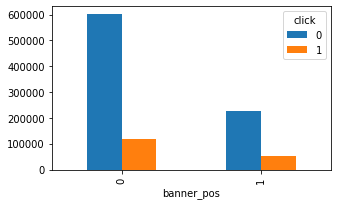

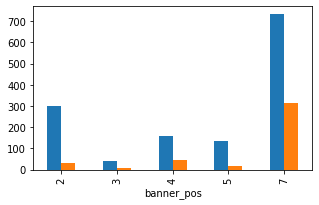

In [ ]:
train.groupby(['banner_pos','click']).size().unstack().iloc[0:2:].plot(kind='bar', figsize = (5,3))
train.groupby(['banner_pos','click']).size().unstack().iloc[2:,:].plot(kind='bar', legend = False, figsize = (5,3))

plt.show()

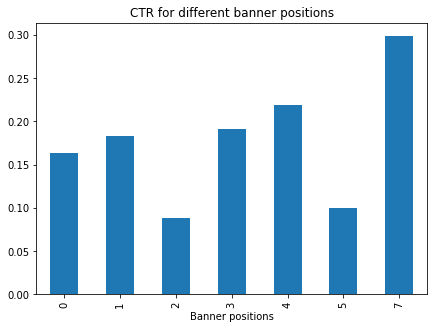

In [ ]:
fig,ax = plt.subplots(figsize=(7,5))
plt.title('CTR for different banner positions')
plt.xlabel('Banner positions')
bannerPosition = train["banner_pos"].loc[train.click == 1].value_counts()/train["banner_pos"].value_counts()
#bannerPosition = pd.DataFrame(bannerPosition)
bannerPosition.plot(kind = "bar", legend = False)

plt.show()

### Provided app information

In [ ]:
train[["app_id", "app_domain", "app_category"]].describe()

,app_id,app_domain,app_category
count,1000000,1000000,1000000
unique,3122,189,28
top,ecad2386,7801e8d9,07d7df22
freq,639568,674245,647696


TODO:
    - wybranie odpowiednich parametrów do predykcji
    - predykcja wspołczynnika CTR klasyfikacją oraz metodą alteratywną 

### Choosing adequate parameters for prediction 


In [ ]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\izkab\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [ ]:
import seaborn as sns

In [ ]:
print(train.dtypes)

id                  uint64
click                int64
hour                 int64
C1                   int64
banner_pos           int64
site_id             object
site_domain         object
site_category       object
app_id              object
app_domain          object
app_category        object
device_id           object
device_ip           object
device_model        object
device_type          int64
device_conn_type     int64
C14                  int64
C15                  int64
C16                  int64
C17                  int64
C18                  int64
C19                  int64
C20                  int64
C21                  int64
dtype: object


In [ ]:
object_cols = train.select_dtypes(['object']).columns.tolist()

for col in object_cols:
	train[col] = train[col].apply(lambda x: hash(x))

<AxesSubplot:>

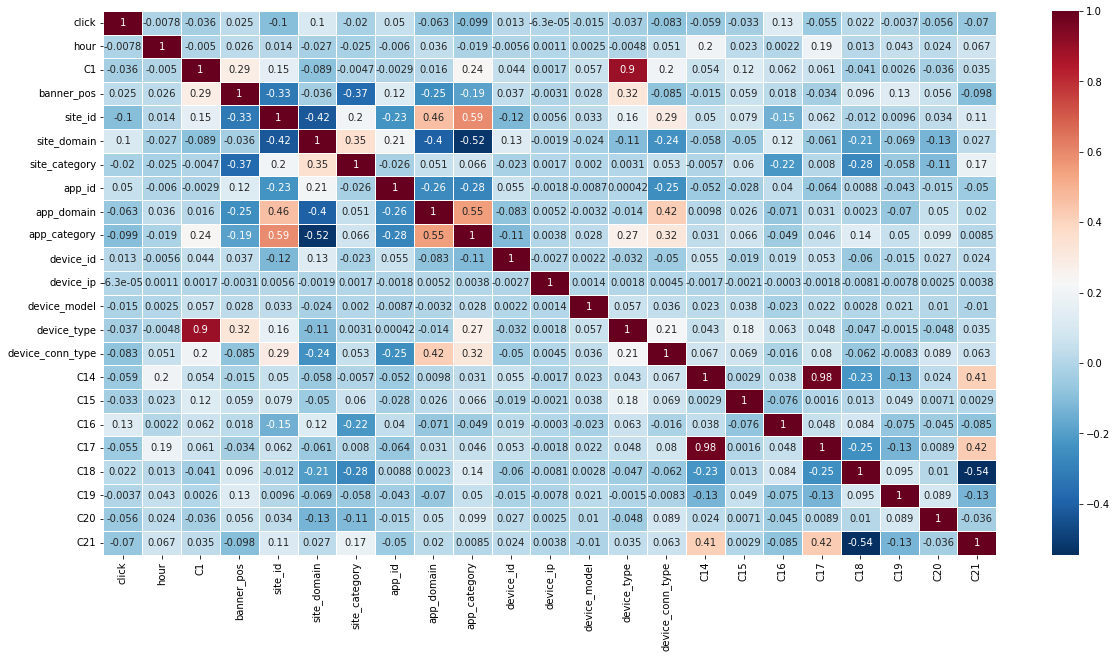

In [ ]:
ad_corr = train.corr(method = 'pearson')
fig,ax = plt.subplots(figsize = (20,10))
sns.heatmap(ad_corr,
            xticklabels=ad_corr.columns,
            yticklabels=ad_corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=1,ax=ax)

In [ ]:
train.drop('id',axis=1,inplace = True)

In [ ]:
print(ad_corr["click"].sort_values())

site_id            -0.100114
app_category       -0.098779
device_conn_type   -0.082506
C21                -0.069819
app_domain         -0.062784
C14                -0.059458
C20                -0.056450
C17                -0.054908
device_type        -0.037322
C1                 -0.035886
C15                -0.033039
site_category      -0.020086
device_model       -0.015416
hour               -0.007785
C19                -0.003693
device_ip          -0.000063
device_id           0.012641
C18                 0.021966
banner_pos          0.025158
app_id              0.049757
site_domain         0.104708
C16                 0.130170
click               1.000000
Name: click, dtype: float64


In [ ]:
train.head()

,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1,14102100,1002,0,5775126285266220427,-6342232362649856817,70941558938082641,2118615010478079586,-5350120886528339990,207772944492415760,...,0,0,21682,320,50,2496,3,167,100191,23
1,0,14102100,1005,0,7081425895117451670,-6342232362649856817,70941558938082641,7706718892903411547,-7530412296524296424,7705063818798278748,...,1,0,19743,320,50,2264,3,427,100000,61
2,0,14102100,1005,0,-5353476162244427074,3710178035007448784,-6435066881935304191,2118615010478079586,-5350120886528339990,207772944492415760,...,1,0,19016,300,250,2162,2,39,-1,33
3,0,14102100,1010,1,7081425895117451670,-6342232362649856817,70941558938082641,-6956137615761030439,-5350120886528339990,7705063818798278748,...,4,2,20352,320,50,2333,0,39,-1,157
4,0,14102100,1005,0,7081425895117451670,-6342232362649856817,70941558938082641,502735525082687332,-7576182283214150293,7705063818798278748,...,1,0,20980,320,50,2371,0,551,100215,46


In [ ]:
x = train.drop(['device_model','device_ip','hour', 'C19', 'click'],axis=1)
y = train.click

In [ ]:
!pip install sklearn

You should consider upgrading via the 'C:\Users\izkab\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=17)

### Choosing an estimator by comparing logarithmic loss of different models 

In [ ]:
pip install catboost

You should consider upgrading via the 'C:\Users\izkab\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


### Prediction using CatBoostClassifier

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
cat_boost= CatBoostClassifier(learning_rate=0.05, loss_function='Logloss', 
                             random_state=111, iterations=100, eval_metric="Logloss")
# logloss because the target has only two different values

In [ ]:
x_test.columns

Index(['C1', 'banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id',
       'app_domain', 'app_category', 'device_id', 'device_type',
       'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C20', 'C21'],
      dtype='object')

In [ ]:
cat_boost.fit(x_train, y_train, eval_set=(x_test, y_test), cat_features= ['C1', 'banner_pos', 'site_id', 
        'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id', 'device_type',
        'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C20', 'C21'], plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6701865	test: 0.6701318	best: 0.6701318 (0)	total: 567ms	remaining: 56.2s
1:	learn: 0.6494024	test: 0.6493857	best: 0.6493857 (1)	total: 1.04s	remaining: 50.9s
2:	learn: 0.6306589	test: 0.6306696	best: 0.6306696 (2)	total: 1.32s	remaining: 42.7s
3:	learn: 0.6135663	test: 0.6135972	best: 0.6135972 (3)	total: 1.68s	remaining: 40.4s
4:	learn: 0.5975564	test: 0.5975657	best: 0.5975657 (4)	total: 2.03s	remaining: 38.5s
5:	learn: 0.5829693	test: 0.5829252	best: 0.5829252 (5)	total: 2.39s	remaining: 37.4s
6:	learn: 0.5695694	test: 0.5694581	best: 0.5694581 (6)	total: 2.71s	remaining: 36s
7:	learn: 0.5572954	test: 0.5571683	best: 0.5571683 (7)	total: 3.08s	remaining: 35.4s
8:	learn: 0.5460654	test: 0.5459514	best: 0.5459514 (8)	total: 3.51s	remaining: 35.5s
9:	learn: 0.5357145	test: 0.5356008	best: 0.5356008 (9)	total: 3.84s	remaining: 34.5s
10:	learn: 0.5261817	test: 0.5260917	best: 0.5260917 (10)	total: 4.16s	remaining: 33.7s
11:	learn: 0.5175323	test: 0.5174049	best: 0.5174049 (

In [ ]:
predictions= cat_boost.predict(x_test, prediction_type="Class", ntree_start=0, ntree_end= cat_boost.get_best_iteration(),
                               thread_count=-1, verbose=None)

In [ ]:
feature_importance = cat_boost.get_feature_importance(prettified=True).sort_index(ascending=True)
feature_importance

,Feature Id,Importances
0,site_id,36.083276
1,app_id,28.712465
2,C17,7.841938
3,C14,6.864991
4,site_domain,6.324283
5,C21,3.904079
6,site_category,1.608441
7,device_id,1.356979
8,device_conn_type,1.200126
9,C18,1.173033


In [ ]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test,predictions)
print(matrix)

[[164610   1491]
 [ 31654   2245]]


In [ ]:
tn, fp, fn, tp = matrix.ravel()
(tn, fp, fn, tp)

(164610, 1491, 31654, 2245)

In [ ]:
from sklearn.metrics import precision_score,recall_score

precision = precision_score(y_test, predictions, average = 'weighted')
print("Precision: %s" %(precision))
recall = recall_score(y_test, predictions, average = 'weighted')
print("Recall: %s" %(recall))

Precision: 0.7984101110884623
Recall: 0.834275


In [ ]:
from sklearn.metrics import log_loss

loss = log_loss(y_test, predictions)
loss

5.723944679045417

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10, random_state = 111)
tree.fit(x_train,y_train)
tree_predictions = tree.predict(x_test)


In [ ]:
matrix2 = confusion_matrix(y_test,tree_predictions)
print(matrix2)

[[164213   1888]
 [ 31454   2445]]


In [ ]:
tn, fp, fn, tp = matrix2.ravel()
(tn, fp, fn, tp)

(164213, 1888, 31454, 2445)

In [ ]:
precision = precision_score(y_test, tree_predictions, average = 'weighted')
print("Precision: %s" %(precision))
recall = recall_score(y_test, tree_predictions, average = 'weighted')
print("Recall: %s" %(recall))

Precision: 0.7926407240166894
Recall: 0.83329


In [ ]:
from sklearn.metrics import log_loss

loss = log_loss(y_test, tree_predictions)
loss

5.7579669609953